In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
train_df = pd.read_csv("./inputs/train.csv").set_index("id")
target = train_df["rainfall"]
train_df.drop("day", inplace=True, axis=1)
train_df.drop("rainfall", inplace=True, axis=1)
train_df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9


In [3]:
# Scale the data
scaler = StandardScaler()
scaler.fit(train_df)
scaled_data = scaler.transform(train_df)
scaled_data

array([[ 0.67170214, -0.91380916, -0.64219876, ..., -0.72939738,
        -0.56090052, -0.4652908 ],
       [ 1.04311572, -1.79828913, -1.35084574, ..., -1.03280391,
        -0.6859253 ,  0.00962944],
       [ 1.85668833, -1.23222195, -1.50406671, ...,  1.25653632,
        -0.43587575, -0.37434863],
       ...,
       [-0.05343865, -1.30298035, -1.46576147, ...,  0.34631671,
        -0.81095007,  1.12114491],
       [ 1.53833383, -1.76290993, -1.6764403 , ..., -1.0052215 ,
        -0.81095007, -0.38445331],
       [ 0.03499315, -0.91380916, -0.92948808, ..., -0.75697979,
        -0.43587575,  2.6469525 ]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

In [5]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=5, min_samples_leaf=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = roc_auc_score(y_test, y_pred)
print(score)

0.7802086351782092


In [6]:
parameter = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
base_model = DecisionTreeClassifier()
grid = GridSearchCV(base_model, parameter, scoring="roc_auc", n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
score = roc_auc_score(y_test, y_pred)
print(score)

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
0.7791417507441848


In [7]:
print(grid.best_score_)
print(grid.best_params_)

0.8813823418190457
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [8]:
criterion = ["gini", "entropy"]
max_depth = [1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
arr = []

for i in criterion:
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                clf = DecisionTreeClassifier(criterion=i, max_depth=j, min_samples_split=k, min_samples_leaf=l)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                score = roc_auc_score(y_test, y_pred)
                arr.append([i, j, k, l, score])

arr

[['gini', 1, 2, 1, 0.7787729511867443],
 ['gini', 1, 2, 2, 0.7787729511867443],
 ['gini', 1, 2, 3, 0.7787729511867443],
 ['gini', 1, 2, 4, 0.7787729511867443],
 ['gini', 1, 2, 5, 0.7787729511867443],
 ['gini', 1, 2, 6, 0.7787729511867443],
 ['gini', 1, 2, 7, 0.7787729511867443],
 ['gini', 1, 2, 8, 0.7787729511867443],
 ['gini', 1, 2, 9, 0.7787729511867443],
 ['gini', 1, 2, 10, 0.7787729511867443],
 ['gini', 1, 3, 1, 0.7787729511867443],
 ['gini', 1, 3, 2, 0.7787729511867443],
 ['gini', 1, 3, 3, 0.7787729511867443],
 ['gini', 1, 3, 4, 0.7787729511867443],
 ['gini', 1, 3, 5, 0.7787729511867443],
 ['gini', 1, 3, 6, 0.7787729511867443],
 ['gini', 1, 3, 7, 0.7787729511867443],
 ['gini', 1, 3, 8, 0.7787729511867443],
 ['gini', 1, 3, 9, 0.7787729511867443],
 ['gini', 1, 3, 10, 0.7787729511867443],
 ['gini', 1, 4, 1, 0.7787729511867443],
 ['gini', 1, 4, 2, 0.7787729511867443],
 ['gini', 1, 4, 3, 0.7787729511867443],
 ['gini', 1, 4, 4, 0.7787729511867443],
 ['gini', 1, 4, 5, 0.7787729511867443]

In [9]:
for i in arr:
    if i[4] > 0.78:
        print(i)

['gini', 4, 2, 1, 0.7802086351782092]
['gini', 4, 2, 2, 0.7802086351782092]
['gini', 4, 2, 4, 0.7802086351782092]
['gini', 4, 2, 5, 0.7802086351782092]
['gini', 4, 2, 6, 0.7802086351782092]
['gini', 4, 2, 7, 0.7802086351782092]
['gini', 4, 3, 1, 0.7802086351782092]
['gini', 4, 3, 2, 0.7802086351782092]
['gini', 4, 3, 4, 0.7802086351782092]
['gini', 4, 3, 5, 0.7802086351782092]
['gini', 4, 3, 6, 0.7802086351782092]
['gini', 4, 3, 7, 0.7802086351782092]
['gini', 4, 4, 4, 0.7802086351782092]
['gini', 4, 4, 5, 0.7802086351782092]
['gini', 4, 4, 6, 0.7802086351782092]
['gini', 4, 4, 7, 0.7802086351782092]
['gini', 4, 5, 2, 0.7802086351782092]
['gini', 4, 5, 3, 0.7802086351782092]
['gini', 4, 5, 4, 0.7802086351782092]
['gini', 4, 5, 5, 0.7802086351782092]
['gini', 4, 5, 6, 0.7802086351782092]
['gini', 4, 5, 7, 0.7802086351782092]
['gini', 4, 6, 1, 0.7802086351782092]
['gini', 4, 6, 4, 0.7802086351782092]
['gini', 4, 6, 5, 0.7802086351782092]
['gini', 4, 6, 6, 0.7802086351782092]
['gini', 4, 

In [10]:
importance_df = pd.DataFrame({
    "Feature": train_df.columns,
    "Importance": clf.feature_importances_,
}).sort_values(by="Importance", ascending=True)

importance_df


,Feature,Importance
2,temparature,0.004560
3,mintemp,0.020741
5,humidity,0.025242
1,maxtemp,0.032638
8,winddirection,0.039853
0,pressure,0.041943
4,dewpoint,0.047385
9,windspeed,0.068974
7,sunshine,0.085069
6,cloud,0.633596


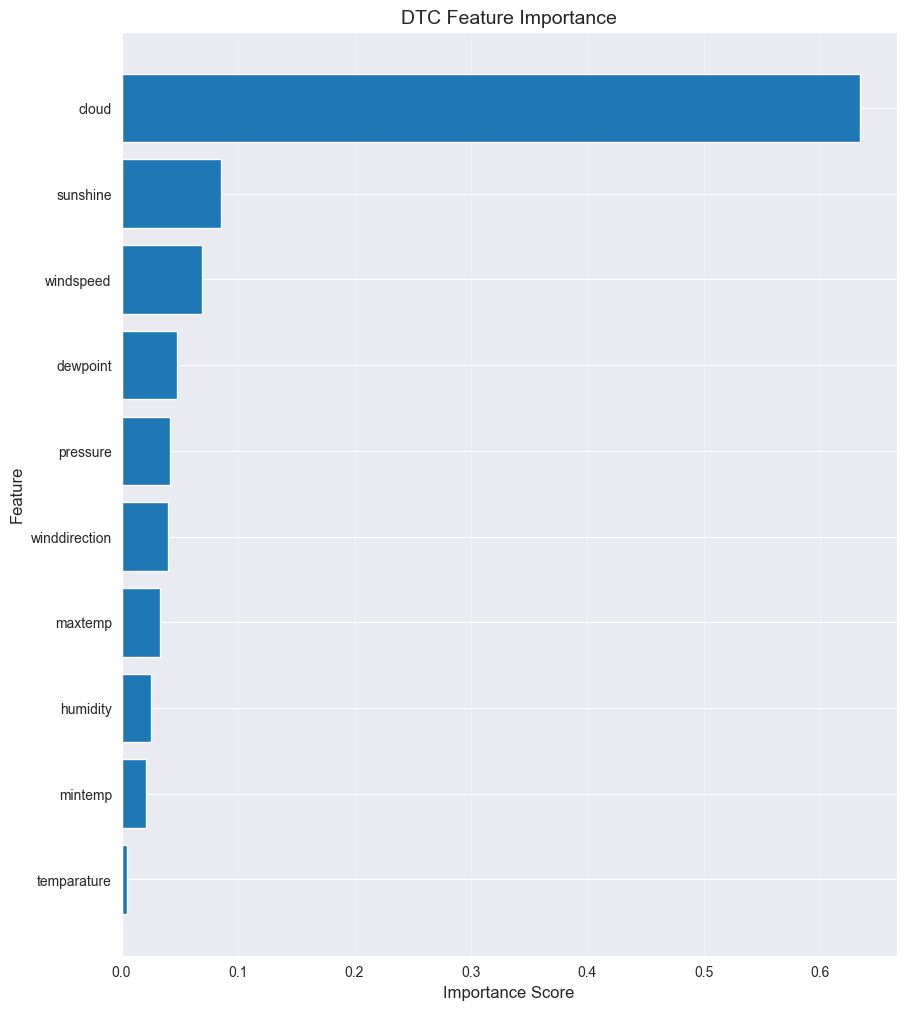

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("DTC Feature Importance", fontsize=14)
plt.grid(axis="x", alpha=0.3)
plt.show()

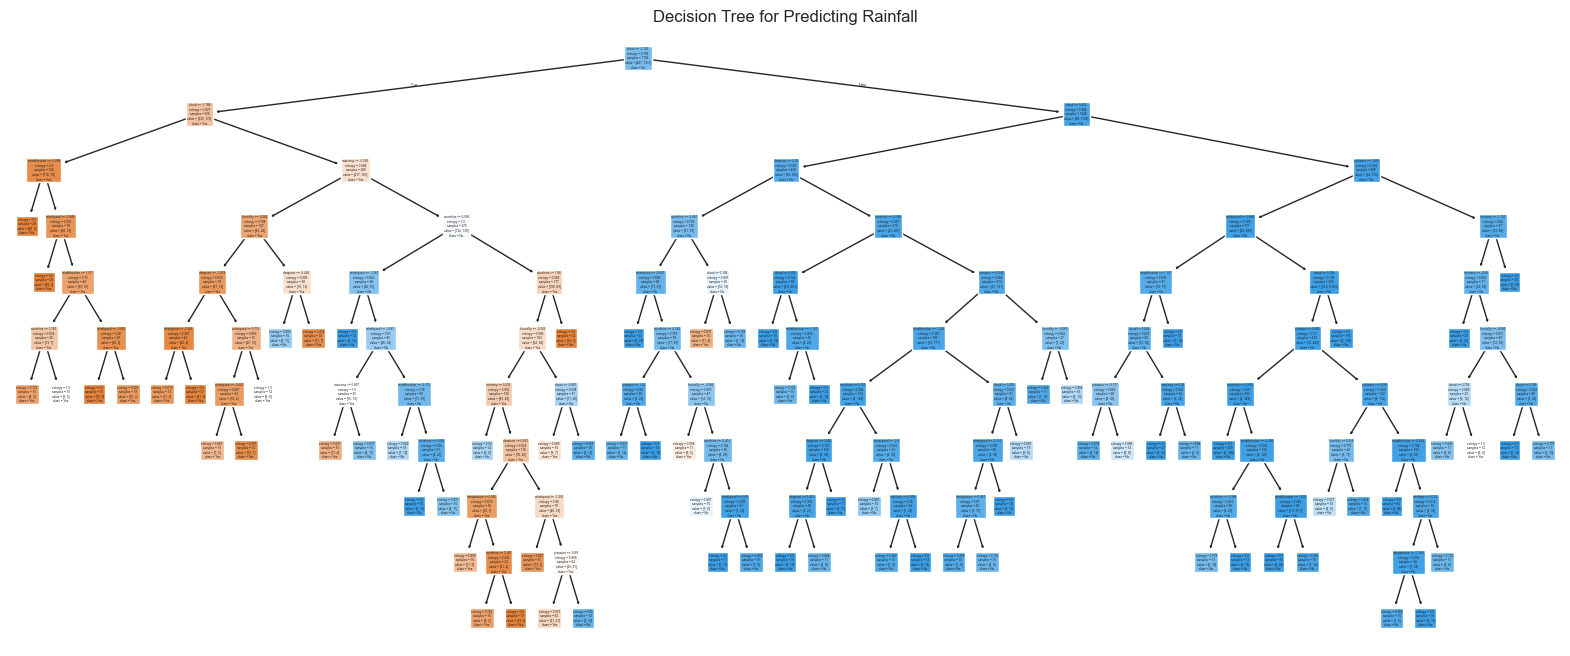

In [15]:
from sklearn import tree

# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(20, 8))
tree.plot_tree(clf, filled=True, feature_names=['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
               class_names=['Yes', 'No'])
plt.title('Decision Tree for Predicting Rainfall')
plt.show()